In [102]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [103]:
data = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pivot_catcherr.csv')
data.head()

,name,season_0,season_1,season_2,age_0,age_1,age_2,weight_0,weight_1,weight_2,...,yacK_0,yacK_1,yacK_2,td_points_0,td_points_1,td_points_2,compilation_0,compilation_1,compilation_2,compilation_3
0,A.J. Green,2011.0,2012.0,2013.0,23.0,24.0,25.0,205.0,205.0,205.0,...,81.219489,139.522963,123.114306,1.024475,1.897369,1.562539,53.006410,98.471570,82.935491,59.741763
1,A.J. Jenkins,2012.0,2013.0,2014.0,23.0,24.0,25.0,192.0,192.0,192.0,...,0.000000,16.276923,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
2,Aaron Brown,2009.0,2010.0,2011.0,24.0,25.0,26.0,196.0,196.0,196.0,...,84.000000,0.000000,0.000000,0.027441,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
3,Aaron Halterman,2007.0,2008.0,2009.0,25.0,26.0,27.0,255.0,255.0,255.0,...,1.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
4,Aaron Moorehead,2003.0,2004.0,2005.0,23.0,24.0,25.0,200.0,200.0,200.0,...,2.534653,1.285714,4.320000,0.000000,0.000000,0.000000,0.240777,0.025880,0.222518,0.274562


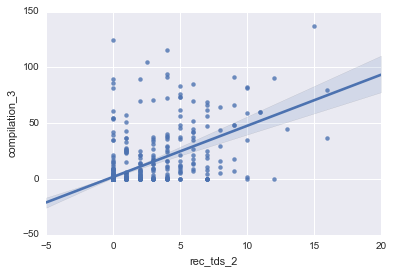

In [104]:
sns.regplot(data['rec_tds_2'], data['compilation_3'])
plt.show()

In [105]:
## creating a smaller dataframe with just the player name and the compilation 3 score
## to be used later to join with the PCA features
comp_df_cols = ['name', 'compilation_3']

comp_df = pd.DataFrame(data[comp_df_cols], columns = comp_df_cols)

In [106]:
comp_df.set_index(comp_df['name'], drop = True, inplace = True)
comp_df.drop('name', axis = 1, inplace = True)
comp_df

,compilation_3
name,
A.J. Green,59.741763
A.J. Jenkins,0.000000
Aaron Brown,0.000000
Aaron Halterman,0.000000
Aaron Moorehead,0.274562
Aaron Walker,0.000000
Adam Jennings,0.000000
Adrian Arrington,0.000000
Adrian Madise,0.000000


In [107]:
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'yacK_0', u'yacK_1', u'yacK_2', u'td_points_0', u'td_points_1',
       u'td_points_2', u'compilation_0', u'compilation_1', u'compilation_2',
       u'compilation_3'],
      dtype='object', length=146)


In [108]:
## I am dropping some of our engineered features since they will be co-linear with
## the other features that were used to create them

data.drop(['yacK_0', 'yacK_1', 'yacK_2', 'td_points_0', 'td_points_1', 'td_points_2', 'compilation_3'],
         axis = 1, inplace = True)
print data.columns

Index([u'name', u'season_0', u'season_1', u'season_2', u'age_0', u'age_1',
       u'age_2', u'weight_0', u'weight_1', u'weight_2',
       ...
       u'pct_of_team_passyards_2', u'pct_team_touchdowns_0',
       u'pct_team_touchdowns_1', u'pct_team_touchdowns_2', u'dropK_0',
       u'dropK_1', u'dropK_2', u'compilation_0', u'compilation_1',
       u'compilation_2'],
      dtype='object', length=139)


season_0 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


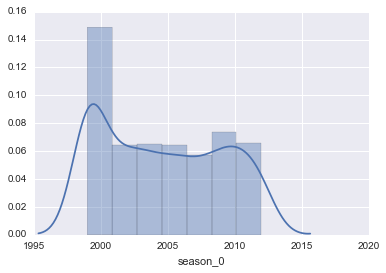


season_1 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


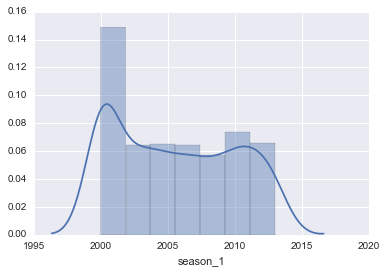


season_2 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


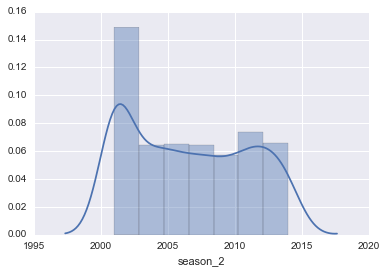


age_0 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


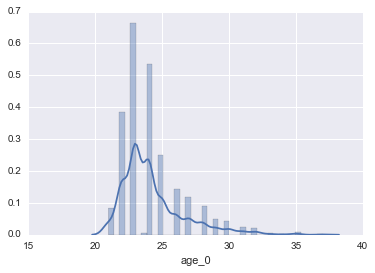


age_1 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


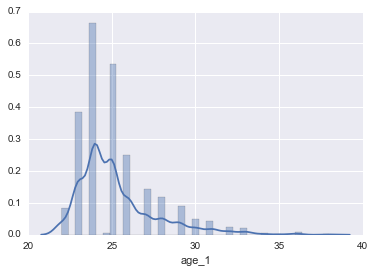


age_2 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


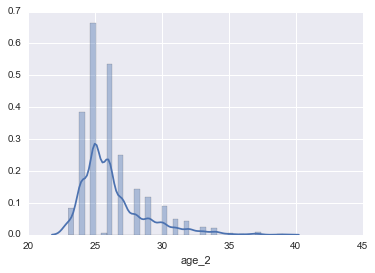


weight_0 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


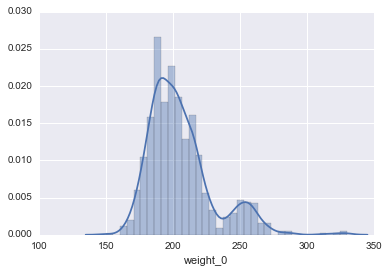


weight_1 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


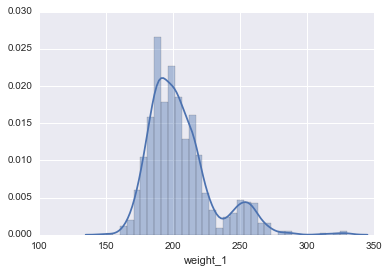


weight_2 :
NormaltestResult(statistic=60.979810355981137, pvalue=5.7332704319870866e-14)


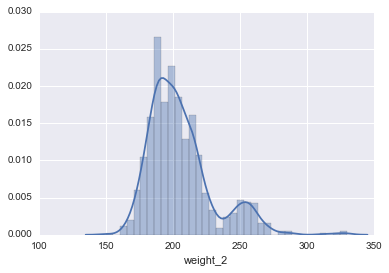


bmi_0 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


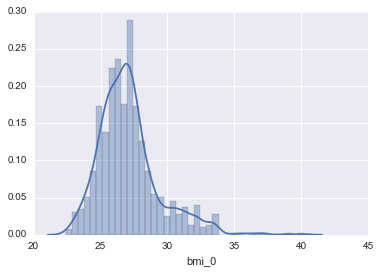


bmi_1 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


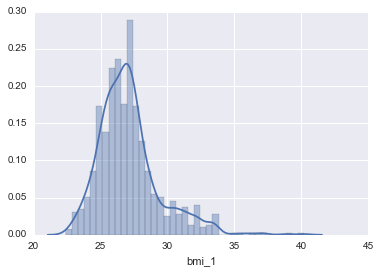


bmi_2 :
NormaltestResult(statistic=62.588585400139038, pvalue=2.5648464206685131e-14)


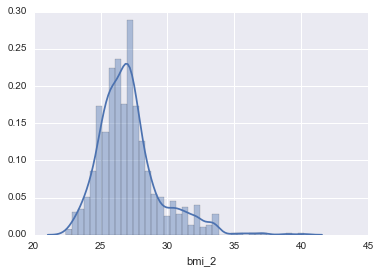


games_0 :
NormaltestResult(statistic=48.23042432765557, pvalue=3.3643132601592961e-11)


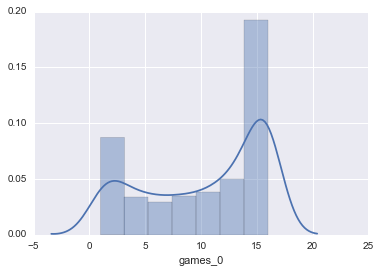


games_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


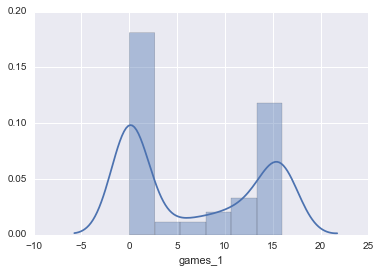


games_2 :
NormaltestResult(statistic=198.38086872911754, pvalue=8.3587569611129675e-44)


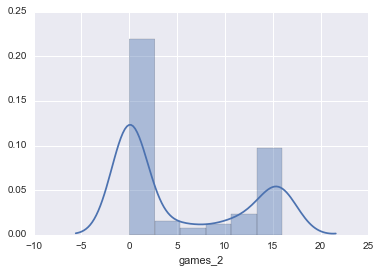


rush_atts_0 :
NormaltestResult(statistic=172.57387569548501, pvalue=3.3578325319042705e-38)


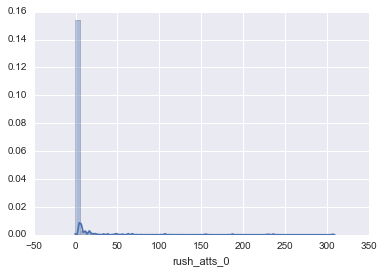


rush_atts_1 :
NormaltestResult(statistic=82.043798532927667, pvalue=1.5290282569181753e-18)


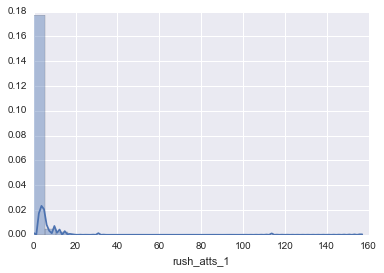


rush_atts_2 :
NormaltestResult(statistic=110.62824145907456, pvalue=9.4925434965386061e-25)


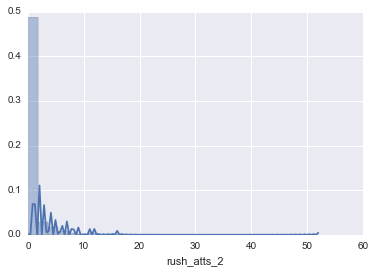


rush_yds_0 :
NormaltestResult(statistic=169.80203622912367, pvalue=1.3426299318490008e-37)


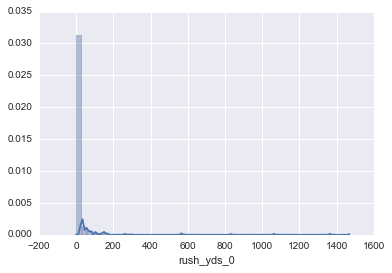


rush_yds_1 :
NormaltestResult(statistic=81.961128439937283, pvalue=1.5935551345382627e-18)


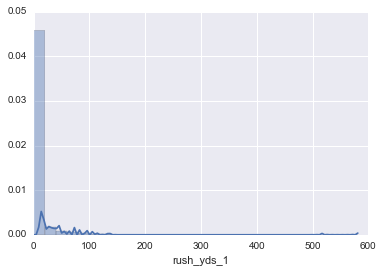


rush_yds_2 :
NormaltestResult(statistic=98.314368000300846, pvalue=4.4802912062907798e-22)


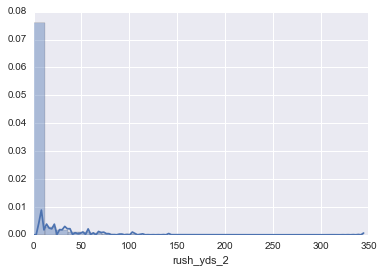


rush_y/a_0 :
NormaltestResult(statistic=77.331653107407533, pvalue=1.613039080321198e-17)


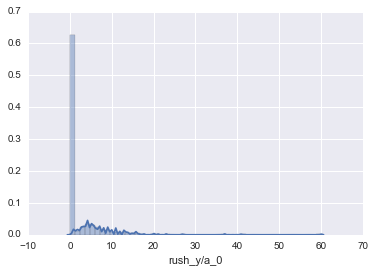


rush_y/a_1 :
NormaltestResult(statistic=145.02575619813723, pvalue=3.2214928712932288e-32)


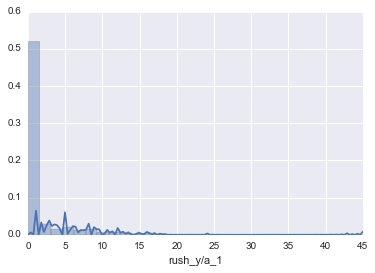


rush_y/a_2 :
NormaltestResult(statistic=76.451372925866593, pvalue=2.5049283165144476e-17)


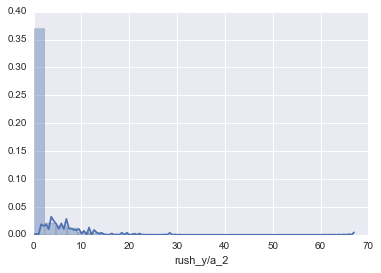


rush_tds_0 :
NormaltestResult(statistic=168.48425183218038, pvalue=2.5948339462590517e-37)


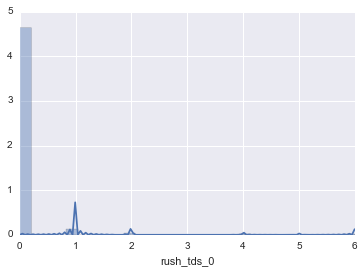


rush_tds_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


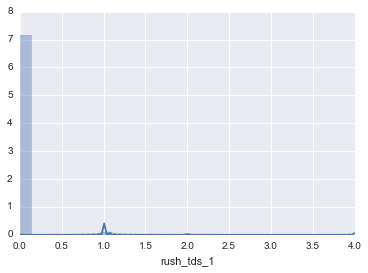


rush_tds_2 :
NormaltestResult(statistic=216.00196087917988, pvalue=1.2467235264002369e-47)


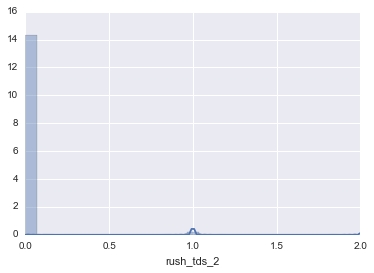


rush_ypg_0 :
NormaltestResult(statistic=169.1127307248027, pvalue=1.8951217384144764e-37)


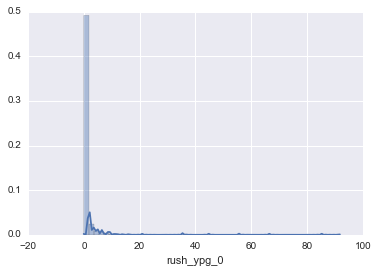


rush_ypg_1 :
NormaltestResult(statistic=79.089783246239946, pvalue=6.6968686452917422e-18)


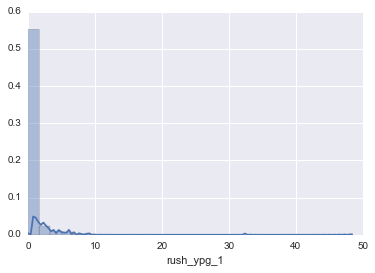


rush_ypg_2 :
NormaltestResult(statistic=112.20000330280176, pvalue=4.3259236291214146e-25)


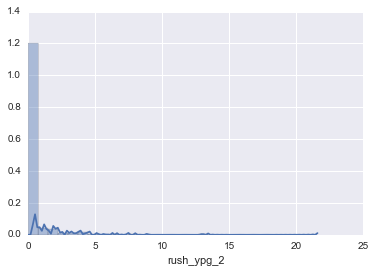


targets_0 :
NormaltestResult(statistic=19.681224185533317, pvalue=5.3244710440115483e-05)


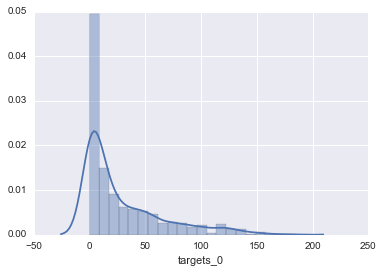


targets_1 :
NormaltestResult(statistic=19.675348724214633, pvalue=5.340135904146282e-05)


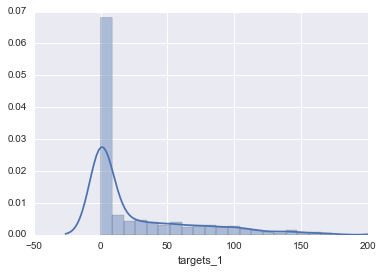


targets_2 :
NormaltestResult(statistic=41.385743643799017, pvalue=1.0308606285434772e-09)


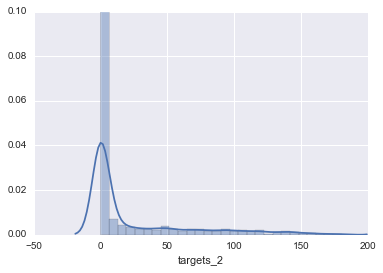


receptions_0 :
NormaltestResult(statistic=18.363334395268627, pvalue=0.00010290882070775562)


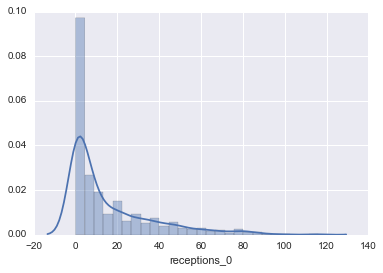


receptions_1 :
NormaltestResult(statistic=24.927757627670989, pvalue=3.86372500032244e-06)


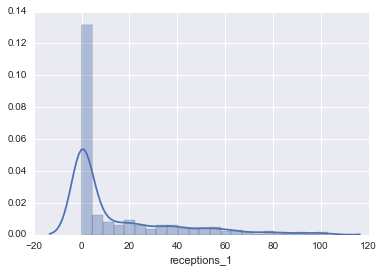


receptions_2 :
NormaltestResult(statistic=46.481607599869633, pvalue=8.0657945337572698e-11)


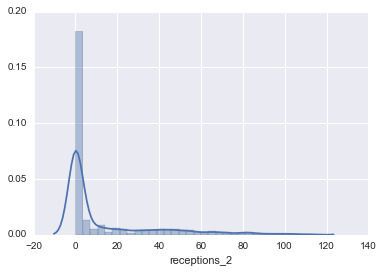


rec_yards_0 :
NormaltestResult(statistic=25.548701592497036, pvalue=2.8325001353814132e-06)


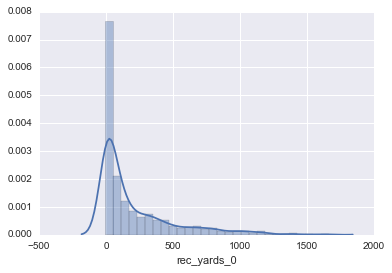


rec_yards_1 :
NormaltestResult(statistic=21.306080514021982, pvalue=2.3628894372364551e-05)


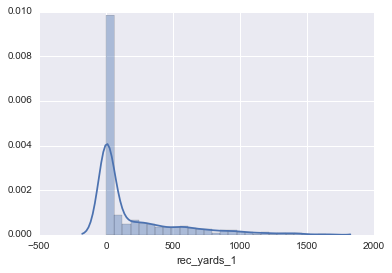


rec_yards_2 :
NormaltestResult(statistic=51.153627229093118, pvalue=7.8006534153214245e-12)


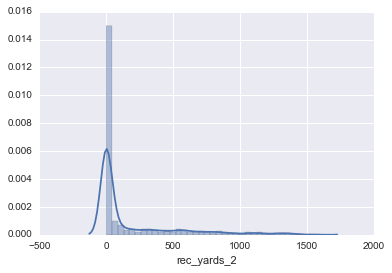


yards/reception_0 :
NormaltestResult(statistic=0.44235781383130901, pvalue=0.80157326046147792)


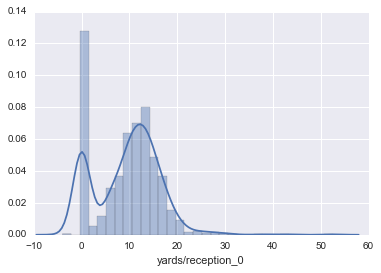


yards/reception_1 :
NormaltestResult(statistic=16.993619972706817, pvalue=0.00020411847225224638)


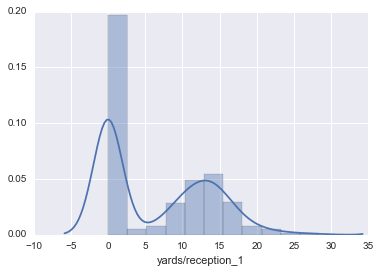


yards/reception_2 :
NormaltestResult(statistic=45.547339253040782, pvalue=1.2868293226937227e-10)


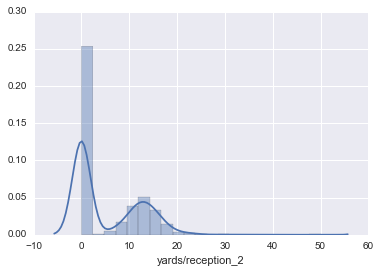


rec_tds_0 :
NormaltestResult(statistic=40.643626598150789, pvalue=1.4939932040490823e-09)


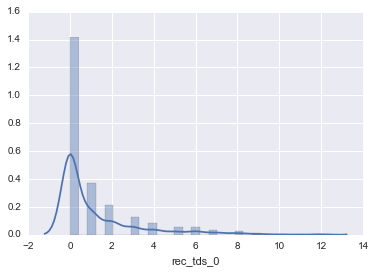


rec_tds_1 :
NormaltestResult(statistic=47.257915614759639, pvalue=5.4710919161598559e-11)


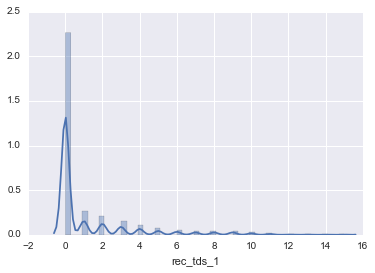


rec_tds_2 :
NormaltestResult(statistic=67.556388474581965, pvalue=2.1395213967008534e-15)


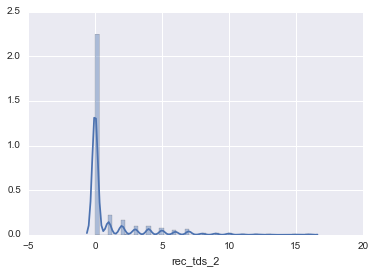


rec_ypg_0 :
NormaltestResult(statistic=21.884934579112041, pvalue=1.7690774135522811e-05)


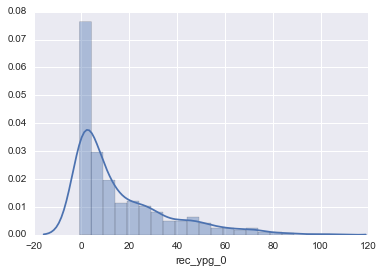


rec_ypg_1 :
NormaltestResult(statistic=19.006305575603413, pvalue=7.4616209577089277e-05)


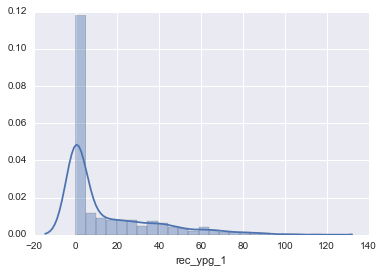


rec_ypg_2 :
NormaltestResult(statistic=45.8724571400586, pvalue=1.0937611576428928e-10)


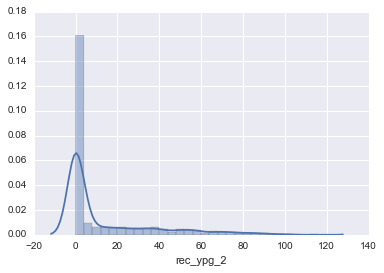


ctch_pct_0 :
NormaltestResult(statistic=6.5578461483777044, pvalue=0.037668801476042027)


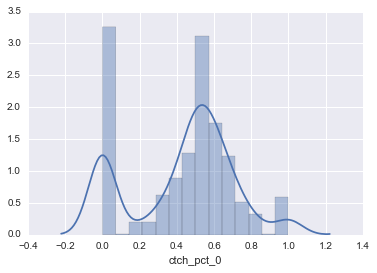


ctch_pct_1 :
NormaltestResult(statistic=377.54127248391364, pvalue=1.0422078374380373e-82)


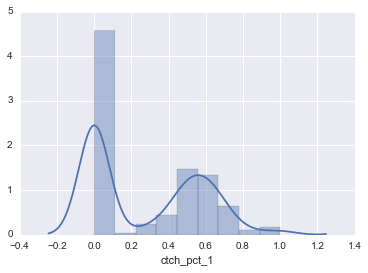


ctch_pct_2 :
NormaltestResult(statistic=136.39333354696802, pvalue=2.4130367495325845e-30)


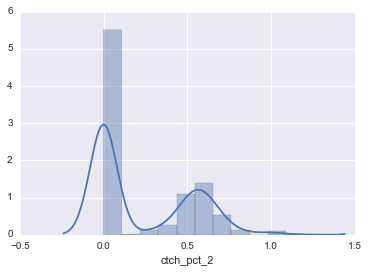


y/tgt_0 :
NormaltestResult(statistic=13.643965264447978, pvalue=0.0010895585854670342)


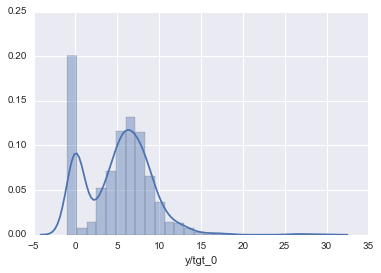


y/tgt_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


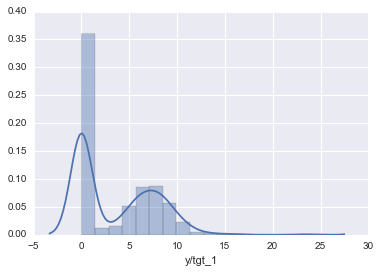


y/tgt_2 :
NormaltestResult(statistic=20.486681280827899, pvalue=3.5593744906636872e-05)


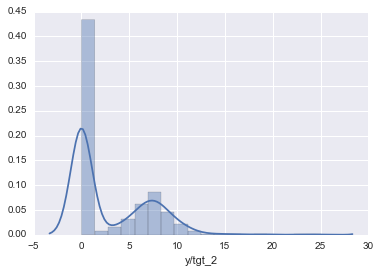


fumbles_0 :
NormaltestResult(statistic=68.237276708620271, pvalue=1.5221716626070971e-15)


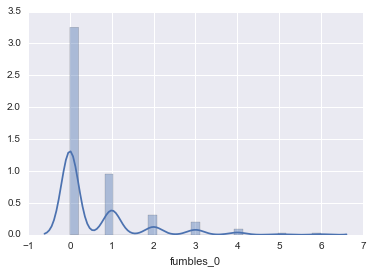


fumbles_1 :
NormaltestResult(statistic=53.458328686758314, pvalue=2.4641742771906534e-12)


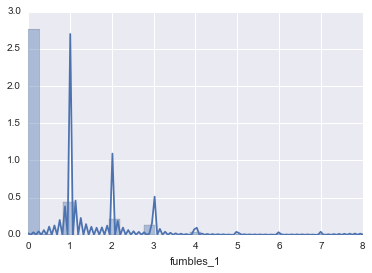


fumbles_2 :
NormaltestResult(statistic=78.883307715222301, pvalue=7.4251866044221598e-18)


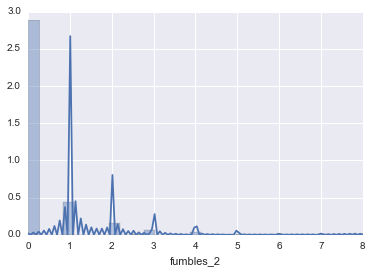


fumbles_recovered_0 :
NormaltestResult(statistic=67.066369610858629, pvalue=2.7335239185807749e-15)


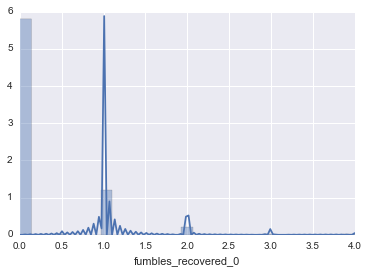


fumbles_recovered_1 :
NormaltestResult(statistic=47.493388127574029, pvalue=4.8634203161939812e-11)


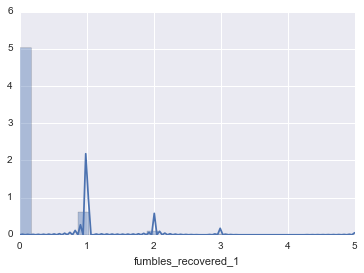


fumbles_recovered_2 :
NormaltestResult(statistic=99.824044794282798, pvalue=2.1061247526381527e-22)


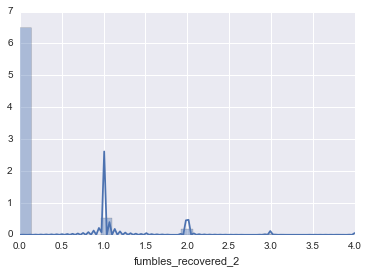


fum_ret_yds_0 :
NormaltestResult(statistic=200.91550402604162, pvalue=2.3537082865718646e-44)


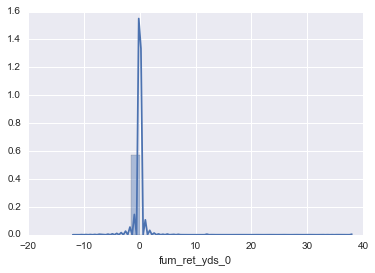


fum_ret_yds_1 :
NormaltestResult(statistic=214.62101291683399, pvalue=2.4867904728141594e-47)


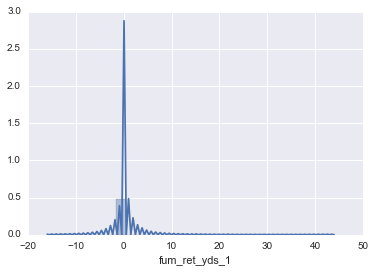


fum_ret_yds_2 :
NormaltestResult(statistic=masked, pvalue=1.0)


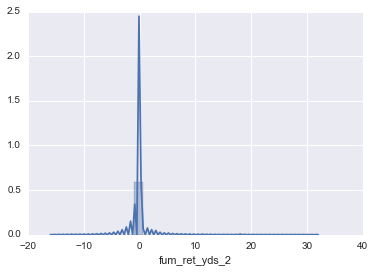


fum_tds_0 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


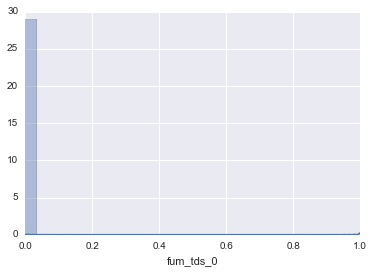


fum_tds_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


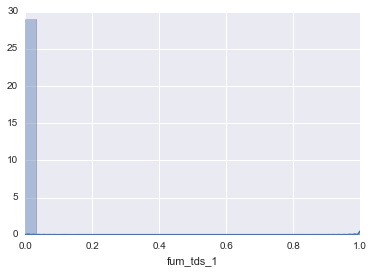


fum_tds_2 :
NormaltestResult(statistic=masked, pvalue=1.0)


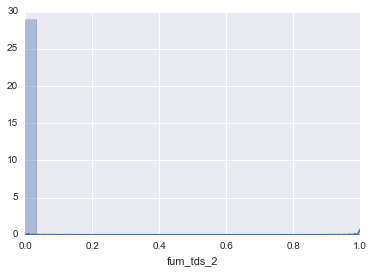


forced_fumbles_0 :
NormaltestResult(statistic=masked, pvalue=1.0)


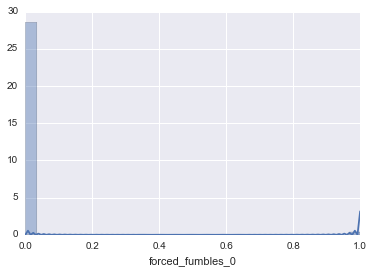


forced_fumbles_1 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


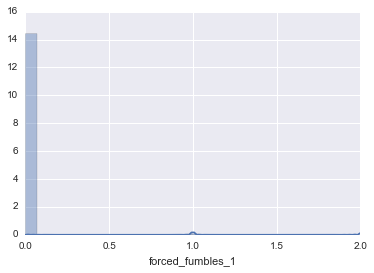


forced_fumbles_2 :
NormaltestResult(statistic=216.00196087917982, pvalue=1.2467235264002729e-47)


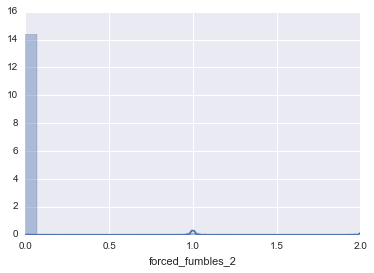


pro_bowls_0 :
NormaltestResult(statistic=157.61051719073342, pvalue=5.9608891692726081e-35)


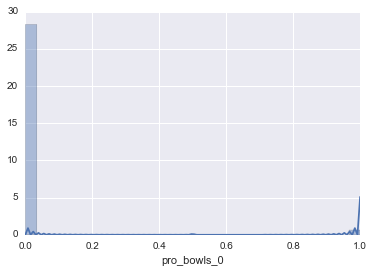


pro_bowls_1 :
NormaltestResult(statistic=171.68560325842532, pvalue=5.2353406014286387e-38)


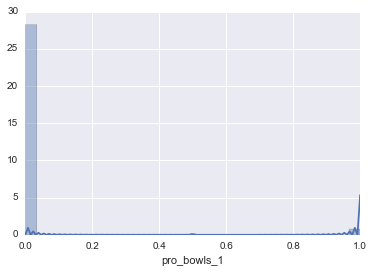


pro_bowls_2 :
NormaltestResult(statistic=108.05912404177788, pvalue=3.429725438770243e-24)


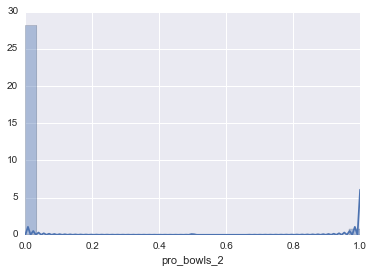


all_pros_0 :
NormaltestResult(statistic=189.03640809320422, pvalue=8.9385184962320358e-42)


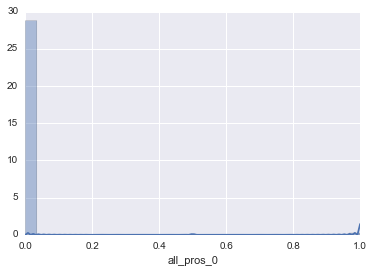


all_pros_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


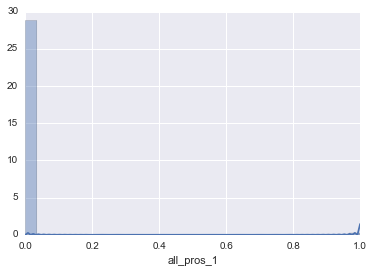


all_pros_2 :
NormaltestResult(statistic=171.68560325842535, pvalue=5.2353406014285625e-38)


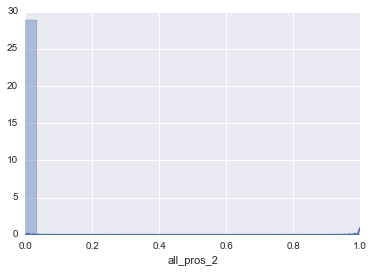


100yd_gms_0 :
NormaltestResult(statistic=87.922976201797056, pvalue=8.0866435722680568e-20)


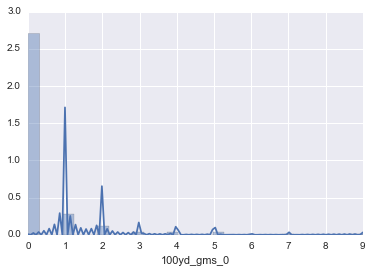


100yd_gms_1 :
NormaltestResult(statistic=72.273097016125178, pvalue=2.0234682201872188e-16)


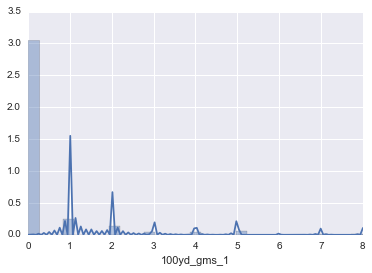


100yd_gms_2 :
NormaltestResult(statistic=108.54913151885003, pvalue=2.6844516299110299e-24)


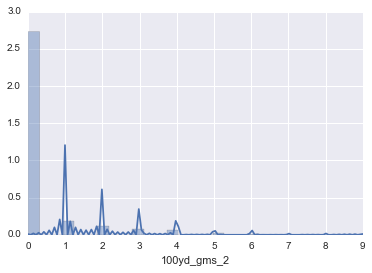


first_down_ctchs_0 :
NormaltestResult(statistic=24.070527843128001, pvalue=5.9313191174023297e-06)


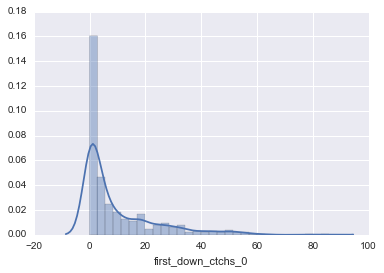


first_down_ctchs_1 :
NormaltestResult(statistic=20.347006295858758, pvalue=3.8168379461313579e-05)


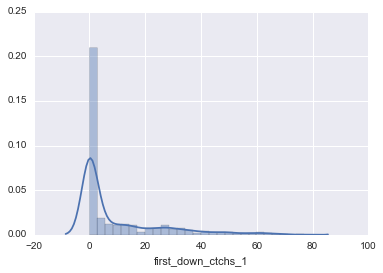


first_down_ctchs_2 :
NormaltestResult(statistic=49.197909788591915, pvalue=2.0740041870601538e-11)


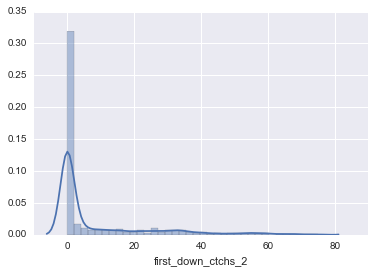


first_down_ctchpct_0 :
NormaltestResult(statistic=63.37286959531086, pvalue=1.7328310295215674e-14)


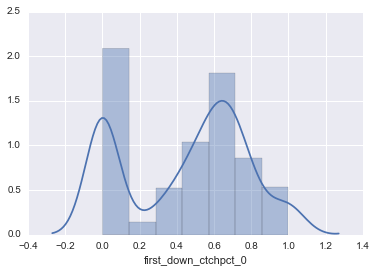


first_down_ctchpct_1 :
NormaltestResult(statistic=masked, pvalue=1.0)


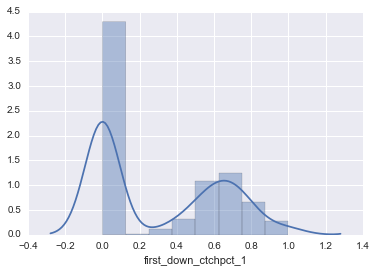


first_down_ctchpct_2 :
NormaltestResult(statistic=116.72133820239054, pvalue=4.511110332396187e-26)


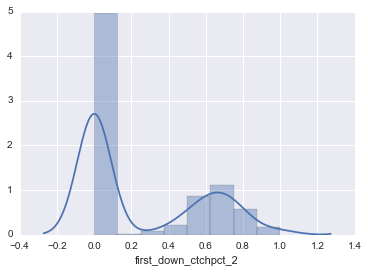


long_ctch_0 :
NormaltestResult(statistic=8.4320370996320122, pvalue=0.014757283081594989)


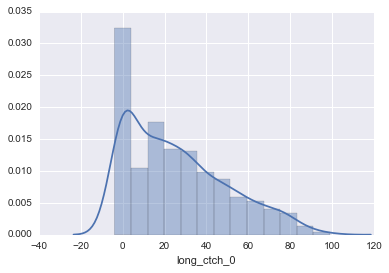


long_ctch_1 :
NormaltestResult(statistic=21.009705920720499, pvalue=2.7403139787235598e-05)


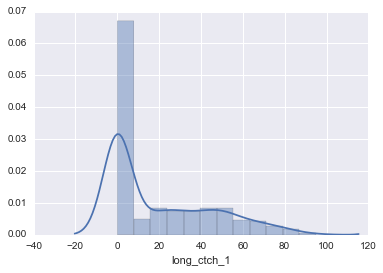


long_ctch_2 :
NormaltestResult(statistic=15.124738133169428, pvalue=0.00051964271629634348)


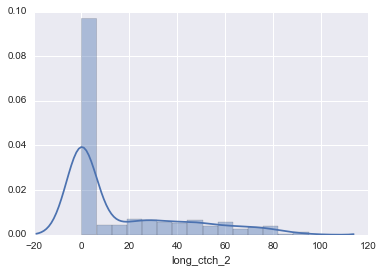


drops_0 :
NormaltestResult(statistic=43.955009331976974, pvalue=2.8529292228568282e-10)


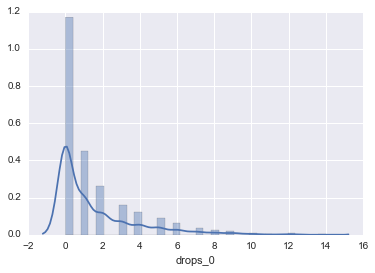


drops_1 :
NormaltestResult(statistic=38.452937827729521, pvalue=4.4673568413912071e-09)


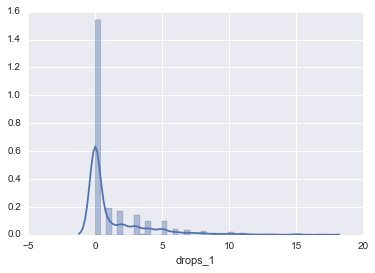


drops_2 :
NormaltestResult(statistic=50.196152461077865, pvalue=1.2590529261151277e-11)


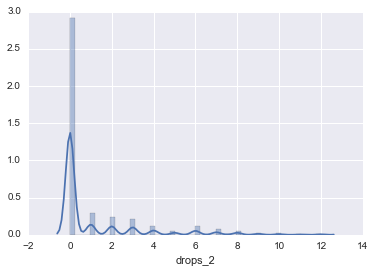


EYds_0 :
NormaltestResult(statistic=48.642658032304197, pvalue=2.7376694883605072e-11)


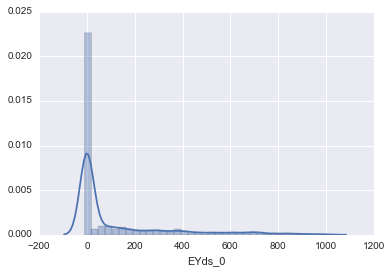


EYds_1 :
NormaltestResult(statistic=19.815438364614877, pvalue=4.9788865547910917e-05)


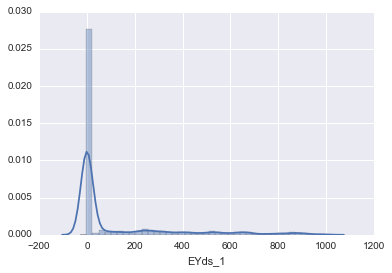


EYds_2 :
NormaltestResult(statistic=55.801231223761533, pvalue=7.636891105828772e-13)


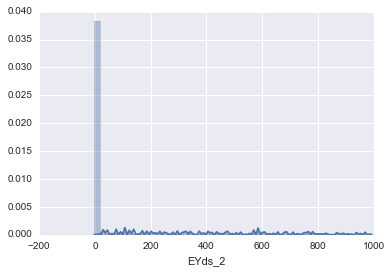


DVOA_0 :
NormaltestResult(statistic=51.76939666783089, pvalue=5.733480606565849e-12)


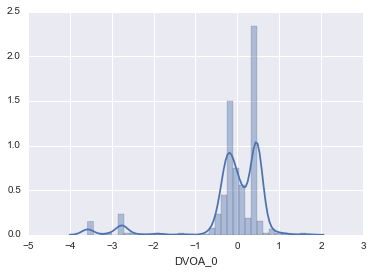


DVOA_1 :
NormaltestResult(statistic=144.26157838396719, pvalue=4.720589962425305e-32)


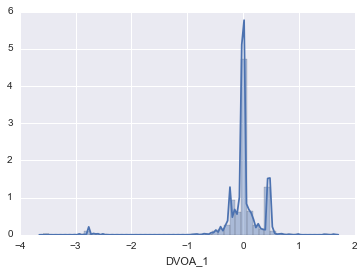


DVOA_2 :
NormaltestResult(statistic=104.45762159666825, pvalue=2.076422249903816e-23)


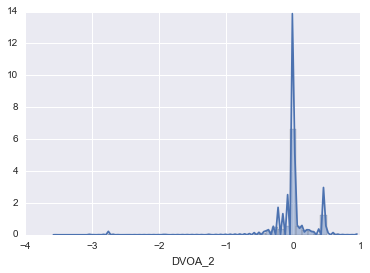


DYAR_0 :
NormaltestResult(statistic=30.184196839627369, pvalue=2.7898762252643319e-07)


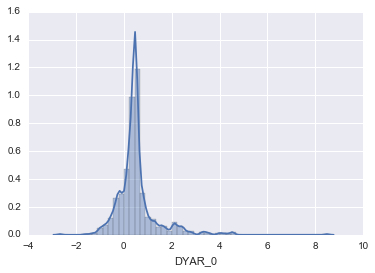


DYAR_1 :
NormaltestResult(statistic=76.461381994218044, pvalue=2.4924236333026262e-17)


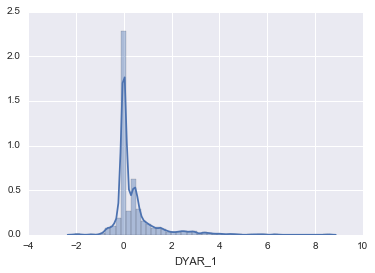


DYAR_2 :
NormaltestResult(statistic=108.76957611395395, pvalue=2.4042888776851774e-24)


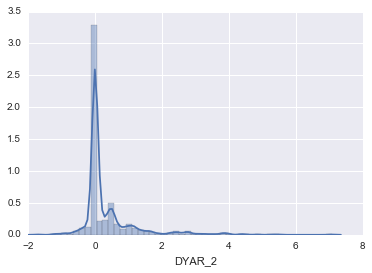


40 Yard_0 :
NormaltestResult(statistic=47.465505033072887, pvalue=4.9316987680448346e-11)


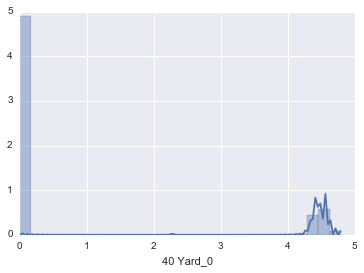


40 Yard_1 :
NormaltestResult(statistic=38.95828784742104, pvalue=3.4698865997446271e-09)


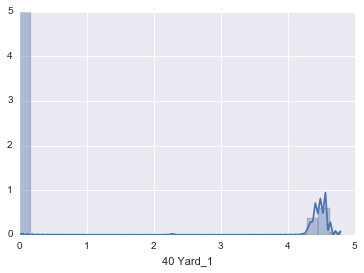


40 Yard_2 :
NormaltestResult(statistic=47.48280485736214, pvalue=4.8892239734318446e-11)


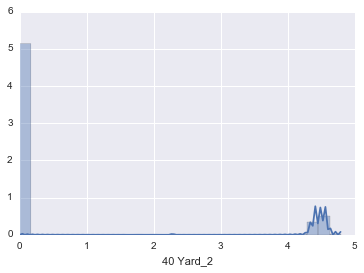


rookie_age_0 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


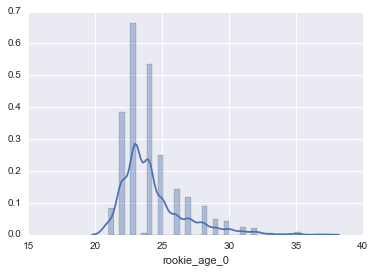


rookie_age_1 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


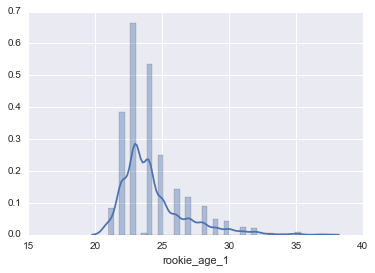


rookie_age_2 :
NormaltestResult(statistic=43.207113127162842, pvalue=4.146623407688461e-10)


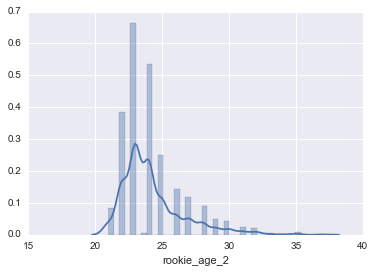


rookie_season_0 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


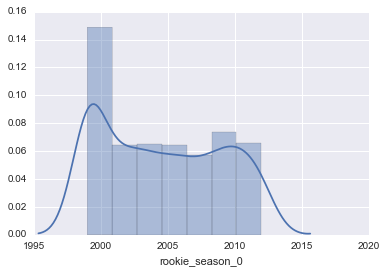


rookie_season_1 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


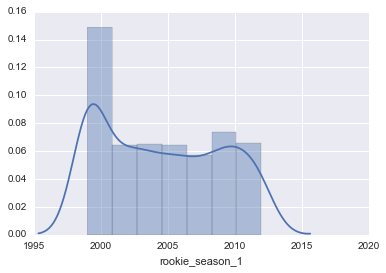


rookie_season_2 :
NormaltestResult(statistic=13.520254482034966, pvalue=0.00115908168178873)


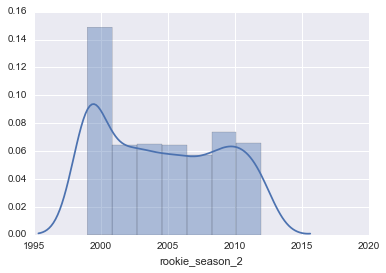


height_inches_0 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


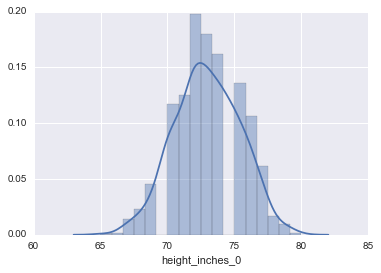


height_inches_1 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


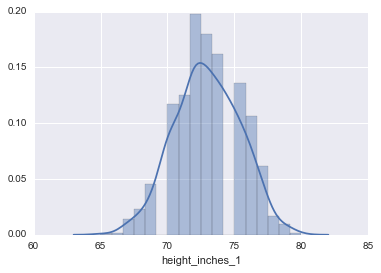


height_inches_2 :
NormaltestResult(statistic=1.0082519199790083, pvalue=0.60403329403651496)


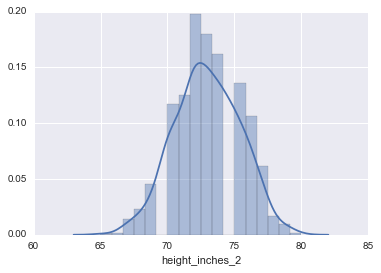


start_ratio_0 :
NormaltestResult(statistic=17.636950209140277, pvalue=0.0001479738328987494)


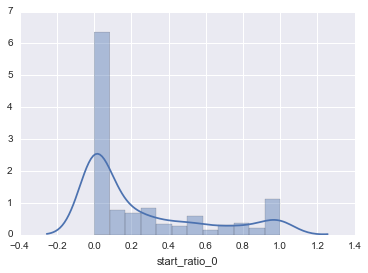


start_ratio_1 :
NormaltestResult(statistic=22.726228897723551, pvalue=1.1616146955178553e-05)


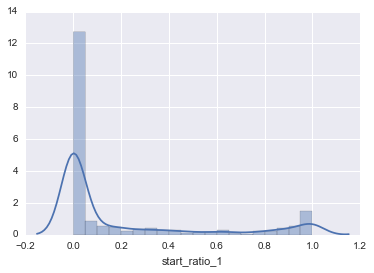


start_ratio_2 :
NormaltestResult(statistic=30.175186252094168, pvalue=2.802473793796659e-07)


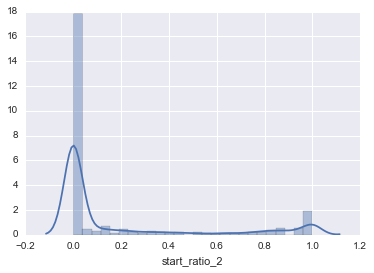


dpis_drawn_0 :
NormaltestResult(statistic=98.090357748261553, pvalue=5.0112890215712531e-22)


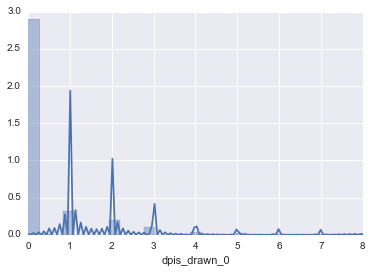


dpis_drawn_1 :
NormaltestResult(statistic=65.655923924947444, pvalue=5.5334662773726241e-15)


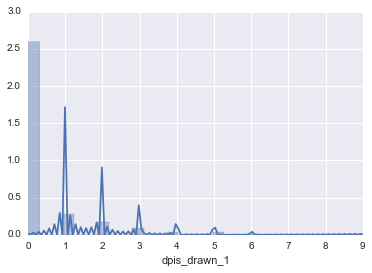


dpis_drawn_2 :
NormaltestResult(statistic=97.295141699339638, pvalue=7.4581037746345678e-22)


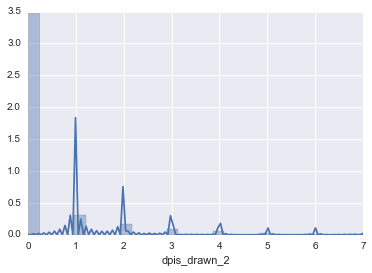


dpi_yards_0 :
NormaltestResult(statistic=117.72240621205299, pvalue=2.7346660111033515e-26)


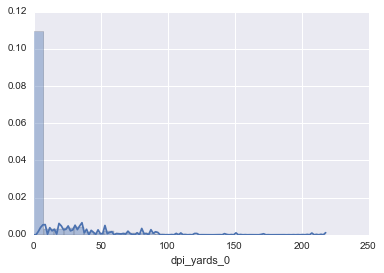


dpi_yards_1 :
NormaltestResult(statistic=68.273248096165005, pvalue=1.4950390797891427e-15)


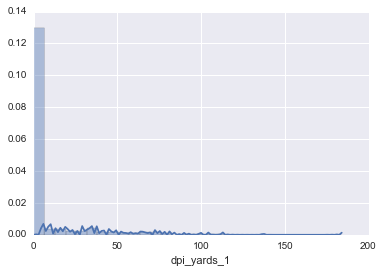


dpi_yards_2 :
NormaltestResult(statistic=112.57552976775723, pvalue=3.5853727407875963e-25)


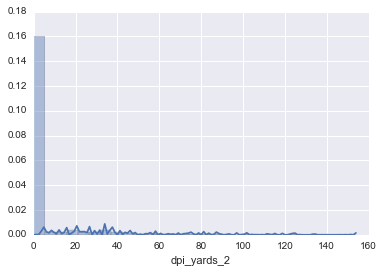


pct_team_tgts_0 :
NormaltestResult(statistic=21.951103934289243, pvalue=1.7115056801998141e-05)


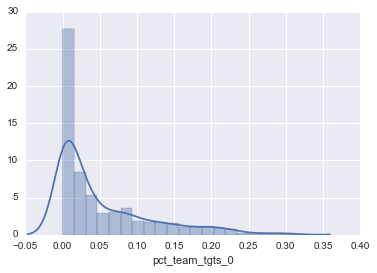


pct_team_tgts_1 :
NormaltestResult(statistic=21.159825598682403, pvalue=2.5421563196608266e-05)


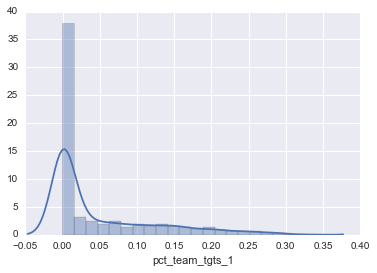


pct_team_tgts_2 :
NormaltestResult(statistic=37.770046990342522, pvalue=6.2854808192125634e-09)


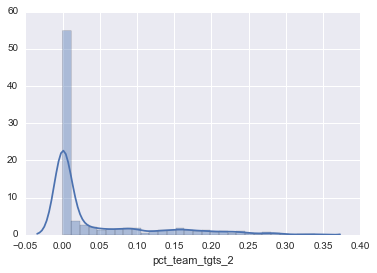


pct_team_receptions_0 :
NormaltestResult(statistic=19.678015162912175, pvalue=5.333021075501282e-05)


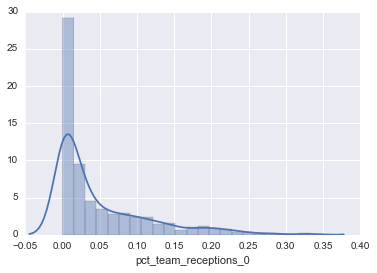


pct_team_receptions_1 :
NormaltestResult(statistic=26.09904138096736, pvalue=2.1511226474829203e-06)


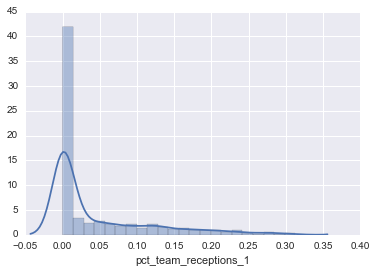


pct_team_receptions_2 :
NormaltestResult(statistic=43.856737878242896, pvalue=2.9966110220907244e-10)


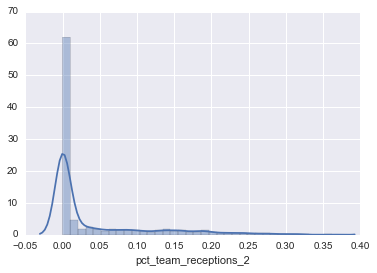


pct_of_team_passyards_0 :
NormaltestResult(statistic=32.43314133911106, pvalue=9.0621833093664194e-08)


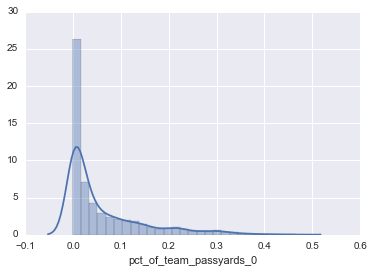


pct_of_team_passyards_1 :
NormaltestResult(statistic=24.301646649665425, pvalue=5.284020324794407e-06)


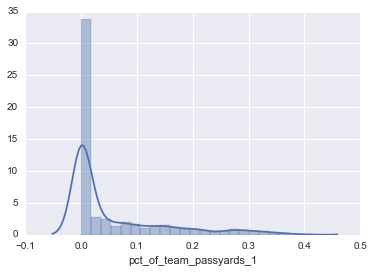


pct_of_team_passyards_2 :
NormaltestResult(statistic=43.815319849977243, pvalue=3.0593149090044634e-10)


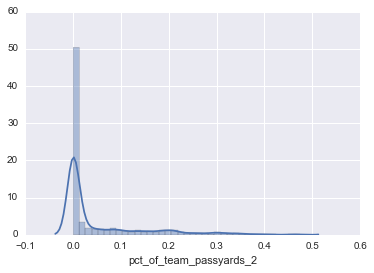


pct_team_touchdowns_0 :
NormaltestResult(statistic=39.211459384753077, pvalue=3.057312140712981e-09)


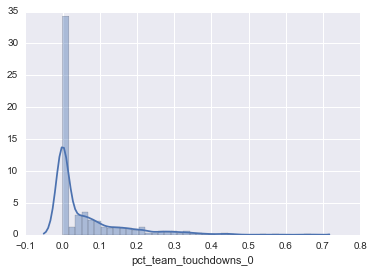


pct_team_touchdowns_1 :
NormaltestResult(statistic=46.877042139828276, pvalue=6.6188057476678818e-11)


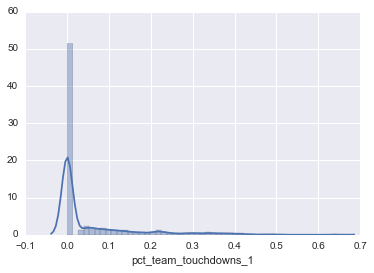


pct_team_touchdowns_2 :
NormaltestResult(statistic=63.912901140055354, pvalue=1.3227868114368528e-14)


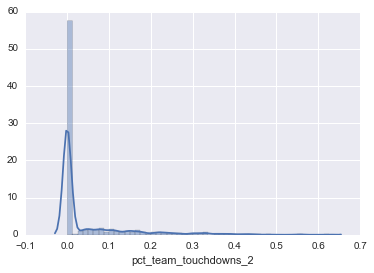


dropK_0 :
NormaltestResult(statistic=19.142939706242718, pvalue=6.9688875867029025e-05)


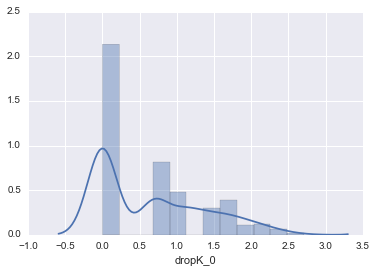


dropK_1 :
NormaltestResult(statistic=17.255955106109667, pvalue=0.0001790263505726371)


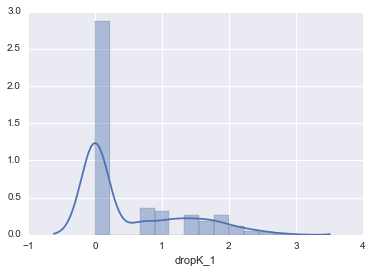


dropK_2 :
NormaltestResult(statistic=19.292856087307108, pvalue=6.4656103835977305e-05)


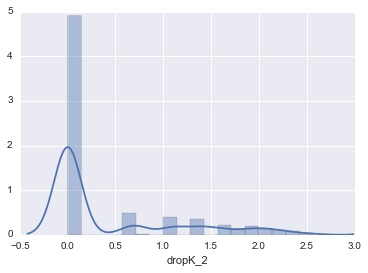


compilation_0 :
NormaltestResult(statistic=52.70527213511474, pvalue=3.5908360140042855e-12)


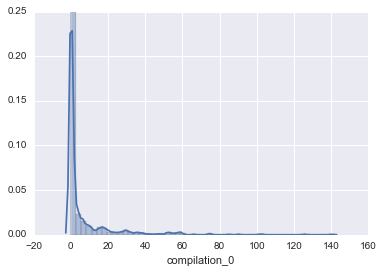


compilation_1 :
NormaltestResult(statistic=82.761122382790191, pvalue=1.0681951862467985e-18)


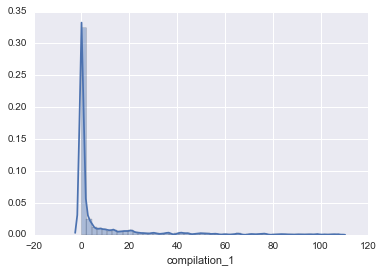


compilation_2 :
NormaltestResult(statistic=90.617057553883811, pvalue=2.1025966543022538e-20)


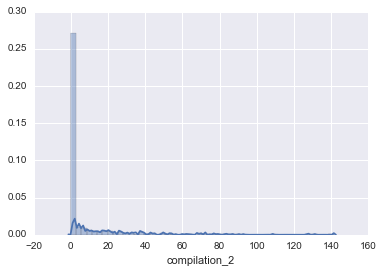

In [109]:
## the following loop will loop through every numeric column in the dataframe and 
## create a histogram of a random sample of that column and also perform a normal 
## test on that histogram

## the normal test sets the null hypothesis as "this sample comes from a normal distribution"
## so we would be able to accept that null hypothesis if the pvalue is greater than .05

import scipy

data_numeric = data[data.describe().columns]

for i in data_numeric:
    rand_sample = data_numeric[i].sample(100, random_state=6)
    print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
    sns.distplot(data_numeric[i])
    plt.xlabel(i)
    plt.show()
    print

In [110]:
## I will be performing PCA on all the numeric columns right now (data_numeric)

from sklearn import preprocessing

## standardizing all the columns

data_stand = preprocessing.StandardScaler().fit_transform(data_numeric)
data_stand

array([[ 1.4452578 ,  1.4452578 ,  1.4452578 , ...,  3.09351025,
         5.03178233,  4.09982337],
       [ 1.67020466,  1.67020466,  1.67020466, ..., -0.43101793,
        -0.39109615, -0.38144212],
       [ 0.99536407,  0.99536407,  0.99536407, ..., -0.3640458 ,
        -0.42418873, -0.38144212],
       ..., 
       [ 0.09557662,  0.09557662,  0.09557662, ..., -0.43101793,
        -0.42418873, -0.38144212],
       [-1.25410456, -1.25410456, -1.25410456, ..., -0.42327917,
        -0.42418873, -0.38144212],
       [-0.35431711, -0.35431711, -0.35431711, ..., -0.42224016,
        -0.42418873, -0.38144212]])

In [111]:
## creating the covariance matrix - this explains the variance between the different
## features within our dataframe

## for example, the value in the i,j position within the matrix explains the variance
## between the ith and the jth elements of a random vector, or between our features

cov_mat = np.cov(data_stand.T)

In [112]:
## creating my eigenvalues and corresponding eigenvectors

eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [113]:
print eigenValues 
print
print
print eigenVectors 

[  4.26756626e+01 +0.00000000e+00j   1.09658029e+01 +0.00000000e+00j
   6.85260726e+00 +0.00000000e+00j   6.67749662e+00 +0.00000000e+00j
   5.44268659e+00 +0.00000000e+00j   4.87253041e+00 +0.00000000e+00j
   4.21209414e+00 +0.00000000e+00j   3.90653537e+00 +0.00000000e+00j
   3.14712129e+00 +0.00000000e+00j   2.80752535e+00 +0.00000000e+00j
   2.60447046e+00 +0.00000000e+00j   2.28054889e+00 +0.00000000e+00j
   2.20355791e+00 +0.00000000e+00j   2.01767267e+00 +0.00000000e+00j
   1.75279093e+00 +0.00000000e+00j   1.62412154e+00 +0.00000000e+00j
   1.48712879e+00 +0.00000000e+00j   1.45170619e+00 +0.00000000e+00j
   1.36885627e+00 +0.00000000e+00j   1.26351077e+00 +0.00000000e+00j
   1.20932105e+00 +0.00000000e+00j   1.16373676e+00 +0.00000000e+00j
   1.10167248e+00 +0.00000000e+00j   1.06265188e+00 +0.00000000e+00j
   1.02955002e+00 +0.00000000e+00j   9.77132554e-01 +0.00000000e+00j
   9.87863476e-01 +0.00000000e+00j   9.46251024e-01 +0.00000000e+00j
   9.33328719e-01 +0.00000000e+00j

In [114]:
## creating the eigenpairs - just pairing the eigenvalue with its eigenvector
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

## sort in ascending order and then reverse to descending (for clarification's sake)
# eigenPairs.sort()
# eigenPairs.reverse()

## loop through the eigenpairs and printing out the first row (eigenvalue)
## this is also seen in the code block above but just wanted to loop through again
## as it is a bit more clear like this
## I am also creating a list of the eigenvalues in ascending order to be able to reference it
sort_values = []
for i in eigenPairs:
    print i[0]
    sort_values.append(i[0])


42.6756626215
10.9658028824
6.85260726496
6.67749661929
5.44268659434
4.87253041222
4.21209414488
3.90653537076
3.1471212918
2.80752535
2.60447046324
2.28054889027
2.20355790829
2.01767267485
1.75279092769
1.62412153764
1.48712878969
1.45170618814
1.36885627254
1.26351076997
1.20932105355
1.16373676016
1.10167248153
1.06265187744
1.02955002037
0.977132553824
0.987863475627
0.946251023912
0.933328718581
0.883806938494
0.852438543758
0.815187261075
0.779471243093
0.798077399522
0.736886319841
0.668026272783
0.686901467034
0.624795844317
0.615178186671
0.578359669435
0.551731907666
0.52743318326
0.502946342672
0.469793996855
0.45541242445
0.452550793995
0.383019424297
0.38714872182
0.398434098719
0.354987015669
0.34268642989
0.325847634799
0.310608994067
0.298567404331
0.290591621469
0.266499762362
0.261634233892
0.252511159961
0.253468885171
0.235434886289
0.225558794994
0.21359498436
0.203684578313
0.19152976662
0.180255904983
0.175010390905
0.167988629233
0.162696098072
0.156002952696


In [115]:
## we have the eigenvalues above showing us feature correlation explanation, but it helps
## to see the cumulative variance explained as well, which i can show below

## need to sum the eigen values to get percentages
sumEigenvalues = sum(eigenValues)

## this is a percentage explanation
variance_explained = [(i/sumEigenvalues)*100 for i in sort_values]
variance_explained

[(30.888929450300491+0j),
 (7.9371213191155627+0j),
 (4.9599628770957311+0j),
 (4.8332166229594993+0j),
 (3.9394528849799992+0j),
 (3.5267700347744895+0j),
 (3.0487418562933688+0j),
 (2.8275763760938171+0j),
 (2.2779073969194186+0j),
 (2.0321055875625045+0j),
 (1.8851331052070104+0j),
 (1.6506765086278823+0j),
 (1.5949499219833325+0j),
 (1.4604049493039382+0j),
 (1.2686817727147666+0j),
 (1.1755500093768192+0j),
 (1.0763937440369247+0j),
 (1.0507546286015979+0j),
 (0.99078730669572712+0j),
 (0.91453752879217565+0j),
 (0.87531465034939604+0j),
 (0.84232043453116323+0j),
 (0.79739789540566874+0j),
 (0.76915452171254262+0j),
 (0.74519517662559009+0j),
 (0.70725506447023612+0j),
 (0.71502217729624451+0j),
 (0.68490280699681549+0j),
 (0.67554955614612011+0j),
 (0.6397053611790593+0j),
 (0.61700070769586601+0j),
 (0.59003798065127144+0j),
 (0.56418648844399311+0j),
 (0.57765374865668051+0j),
 (0.53336323675492736+0j),
 (0.4835218750780671+0j),
 (0.49718386666251962+0j),
 (0.4522314024069567+

In [116]:
### based on the above results, it seems that sticking to 46 features would be a decent
## cutoff point since the variance explained per feature drops below .3%

## this can very easily be manipulated by changing n_components adn then adding/subtracting
## columns to the dataframe in the code block below

## instantiate
pca = PCA(n_components = 46)

## fit and transform the standardized data
pca_cols = pca.fit_transform(data_stand)

In [117]:
## Here I am simply creating the column headers for the pca features
pca_col_list = []

for i in range(1, 47):
    pca_col_list.append('pca'+str(i))
    

In [118]:
## going to organize the columns into dataframe for organization
pca_df = pd.DataFrame(pca_cols, columns = pca_col_list)

##previewing dataframe
print pca_df.shape
pca_df.head()

(872, 46)


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46
0,21.633630,0.273788,5.109747,0.017529,-0.489786,2.942728,8.987184,5.921443,-0.937798,4.123993,...,-0.061901,1.395038,0.383280,0.059968,-0.105363,0.825732,1.456950,-0.194284,0.844275,-0.680275
1,-3.553071,-3.998518,0.003787,-2.157599,2.004680,1.711588,2.518670,0.487570,-0.146585,-1.405744,...,0.613928,-0.772461,0.668987,0.724195,-0.296523,0.059008,0.426285,-0.384131,0.366265,0.014358
2,-4.165099,0.023286,0.826708,-2.365964,-1.055428,-1.299915,1.570895,-0.368792,-1.067429,0.621322,...,-0.365961,0.216688,-0.246378,-0.629155,0.352697,0.086190,0.273893,-1.090547,-0.289305,0.335942
3,-5.451092,1.523389,4.425502,1.154131,0.228568,1.318073,-0.302181,-0.554502,0.682314,0.773120,...,0.061930,-0.241071,-0.470592,-0.018552,0.186357,0.056577,-0.259915,-0.021020,-0.252481,-0.581631
4,-1.942379,-1.166251,-0.562981,0.579497,1.087568,-1.674914,-1.911220,0.091295,-0.636837,2.676177,...,-0.255398,-0.063033,0.277470,0.211407,-0.220635,0.015485,0.576669,0.803359,0.234997,-0.543444


In [119]:
## We used all of our columns to perform the PCA so we only need to join the names back on
## since we would not want to build a model off of the PCA features as well as the 
## original features that were used to construct the PCA columns

## I am going to set the index of our pca dataframe to the names of the related player

pca_df.set_index(data['name'], drop = False, inplace = True)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.633630,0.273788,5.109747,0.017529,-0.489786,2.942728,8.987184,5.921443,-0.937798,4.123993,...,-0.061901,1.395038,0.383280,0.059968,-0.105363,0.825732,1.456950,-0.194284,0.844275,-0.680275
A.J. Jenkins,-3.553071,-3.998518,0.003787,-2.157599,2.004680,1.711588,2.518670,0.487570,-0.146585,-1.405744,...,0.613928,-0.772461,0.668987,0.724195,-0.296523,0.059008,0.426285,-0.384131,0.366265,0.014358
Aaron Brown,-4.165099,0.023286,0.826708,-2.365964,-1.055428,-1.299915,1.570895,-0.368792,-1.067429,0.621322,...,-0.365961,0.216688,-0.246378,-0.629155,0.352697,0.086190,0.273893,-1.090547,-0.289305,0.335942
Aaron Halterman,-5.451092,1.523389,4.425502,1.154131,0.228568,1.318073,-0.302181,-0.554502,0.682314,0.773120,...,0.061930,-0.241071,-0.470592,-0.018552,0.186357,0.056577,-0.259915,-0.021020,-0.252481,-0.581631
Aaron Moorehead,-1.942379,-1.166251,-0.562981,0.579497,1.087568,-1.674914,-1.911220,0.091295,-0.636837,2.676177,...,-0.255398,-0.063033,0.277470,0.211407,-0.220635,0.015485,0.576669,0.803359,0.234997,-0.543444


In [121]:
joined_df = pca_df.join(comp_df)
joined_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,compilation_3
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,21.633630,0.273788,5.109747,0.017529,-0.489786,2.942728,8.987184,5.921443,-0.937798,4.123993,...,1.395038,0.383280,0.059968,-0.105363,0.825732,1.456950,-0.194284,0.844275,-0.680275,59.741763
A.J. Jenkins,-3.553071,-3.998518,0.003787,-2.157599,2.004680,1.711588,2.518670,0.487570,-0.146585,-1.405744,...,-0.772461,0.668987,0.724195,-0.296523,0.059008,0.426285,-0.384131,0.366265,0.014358,0.000000
Aaron Brown,-4.165099,0.023286,0.826708,-2.365964,-1.055428,-1.299915,1.570895,-0.368792,-1.067429,0.621322,...,0.216688,-0.246378,-0.629155,0.352697,0.086190,0.273893,-1.090547,-0.289305,0.335942,0.000000
Aaron Halterman,-5.451092,1.523389,4.425502,1.154131,0.228568,1.318073,-0.302181,-0.554502,0.682314,0.773120,...,-0.241071,-0.470592,-0.018552,0.186357,0.056577,-0.259915,-0.021020,-0.252481,-0.581631,0.000000
Aaron Moorehead,-1.942379,-1.166251,-0.562981,0.579497,1.087568,-1.674914,-1.911220,0.091295,-0.636837,2.676177,...,-0.063033,0.277470,0.211407,-0.220635,0.015485,0.576669,0.803359,0.234997,-0.543444,0.274562
Aaron Walker,-4.577902,3.235832,4.134047,0.768639,0.484557,0.519849,-0.718845,-1.612041,0.638707,2.298082,...,-0.149624,-0.052144,0.187997,0.062014,0.133297,0.711356,-0.172719,0.240830,0.224285,0.000000
Adam Jennings,-4.247849,0.014136,-1.341694,-1.189212,-0.600523,-1.234911,1.884857,-1.120425,-0.223028,0.876355,...,0.264764,0.137854,-0.478940,0.539225,0.397598,0.641855,-0.368930,0.243393,0.986106,0.000000
Adrian Arrington,-3.052097,-1.320828,-0.694159,-2.065940,2.615512,-0.543902,2.045060,-1.556658,-0.494259,2.856942,...,0.429324,0.336056,0.636278,-1.667299,-0.934027,-0.088692,0.965022,0.472495,0.050098,0.000000
Adrian Madise,-4.954376,0.171663,0.513670,0.260822,-1.292227,0.341782,-0.850597,1.291409,-0.014610,-1.250347,...,0.419543,-0.534117,-0.741764,-0.358574,0.318913,0.266540,-0.269373,0.566611,0.350304,0.000000


In [122]:
## Now I will export this new dataframe as a CSV

joined_df.to_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/pca_catcherr.csv')